<a href="https://colab.research.google.com/github/udayPatil45/Computer_Vision_SOC/blob/main/Week5_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.8551278710365295
Epoch 100, Loss: 0.07420194894075394
Epoch 200, Loss: 0.047009095549583435
Epoch 300, Loss: 0.023593313992023468
Epoch 400, Loss: 0.012854648754000664
Epoch 500, Loss: 0.00940023921430111
Epoch 600, Loss: 0.00832443218678236
Epoch 700, Loss: 0.007740088272839785
Epoch 800, Loss: 0.007338688243180513
Epoch 900, Loss: 0.007012192625552416


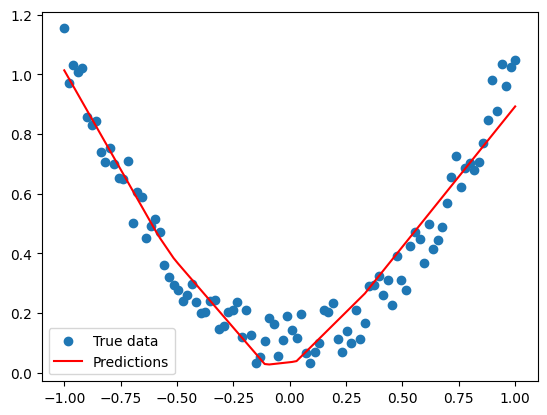

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# 1. Create sample data
X = torch.linspace(-1, 1, 100).unsqueeze(1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

# 2. Define a simple neural network
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        return self.layer2(x)

model = NeuralNet()

# 3. Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

# 4. Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# 5. Plot results
plt.scatter(X.numpy(), y.numpy(), label="True data")
plt.plot(X.numpy(), y_pred.detach().numpy(), label="Predictions", color="red")
plt.legend()
plt.show()
